## Classification Class 1
### Author: Ricardo Vallejo


Classification is a type of supervised machine learning problem where the target (response) variable is categorical.

In [92]:
# https://www.kaggle.com/ar2017/basics-of-feature-selection-with-python
# https://www.kaggle.com/danalexandru/simple-analysis-of-iris-dataset
# https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b

Objective: choosing a subset of input features that contribute the most to the output feature for use in model construction

-Reduce training time

-Reduce the risk of overfitting
-Potentially increase model's performance
-Reduce model's complexity such that interpretation becomes easier

-High-dimensional datasets are not preferred because they have lengthy training time and have high risk of overfitting.



# 1.  Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

# 1. Téléchargez le contenu de la base de données iris

data = pd.read_csv("iris.csv")
pd.set_option('display.max_rows', None)
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# 2.  Identify Classes et Features

Features ou Attributes:  Features are individual independent variables that act like a input in your system. Actually, while making the predictions, models use such features to make the predictions  

In [4]:
fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics

In [5]:
cn = ['setosa', 'versicolor', 'virginica'] #Classes

## 2.1. Check the distribution or instances of any class


In [6]:
data.groupby('species').size()  #Class species ALL DATA

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## 2.2. Split data in Training Data and Test Data

We can split the dataset into a training set and a test set. Usually, we should also have a validation set

In [53]:
#Repartition des donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 10) #40% data for tests


In [8]:
train.groupby('species').size() #SPLITED DATA TRAINING

species
setosa        30
versicolor    30
virginica     30
dtype: int64

In [9]:
test.groupby('species').size() #SPLITED DATA TESTS

species
setosa        20
versicolor    20
virginica     20
dtype: int64

## 2.3 Creation de matrices des characteristiques

In [10]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics

X_train = train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test.species

print(X_train)
print(Y_train)


     sepal_length  sepal_width  petal_length  petal_width
75            6.6          3.0           4.4          1.4
76            6.8          2.8           4.8          1.4
104           6.5          3.0           5.8          2.2
128           6.4          2.8           5.6          2.1
138           6.0          3.0           4.8          1.8
129           7.2          3.0           5.8          1.6
88            5.6          3.0           4.1          1.3
111           6.4          2.7           5.3          1.9
86            6.7          3.1           4.7          1.5
99            5.7          2.8           4.1          1.3
27            5.2          3.5           1.5          0.2
60            5.0          2.0           3.5          1.0
69            5.6          2.5           3.9          1.1
83            6.0          2.7           5.1          1.6
13            4.3          3.0           1.1          0.1
73            6.1          2.8           4.7          1.2
107           

# 3. Exploratory Data Analysis

## 3.1. Visualisation of data distribution

<Figure size 1440x1080 with 0 Axes>

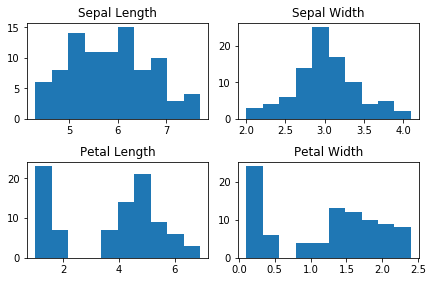

In [11]:
# Visualisation of data distribution

n_bins = 10

plt.figure(figsize = (20,15))
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(X_train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');

axs[0,1].hist(X_train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');

axs[1,0].hist(X_train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');

axs[1,1].hist(X_train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

Observations:

    Both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others
    suggesting that there might be different groups in this data.
    
    Petal length and petal width seem to diverge from the normal distribution.

We can do numerical analysis for this type of conclusion:

In [12]:
import scipy.stats as stats

for param in ['sepal_length','sepal_width', 'petal_length','petal_width']:
    z, pval = stats.normaltest(data[param])
    #print(z)
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))

sepal_length has a p-value of 0.056824
sepal_width has a p-value of 0.167241
petal_length has a p-value of 0.000000 - distribution is not normal
petal_width has a p-value of 0.000000 - distribution is not normal


## 3.2.  Cool Boxplot

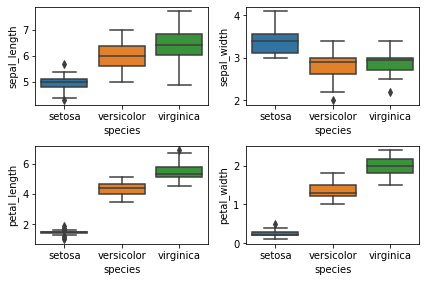

In [13]:
fig, axs = plt.subplots(2, 2)
sns.boxplot(x = 'species', y = 'sepal_length', data = train,  order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width',  data = train,  order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train,  order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width',  data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

## 3.3. Pair plot

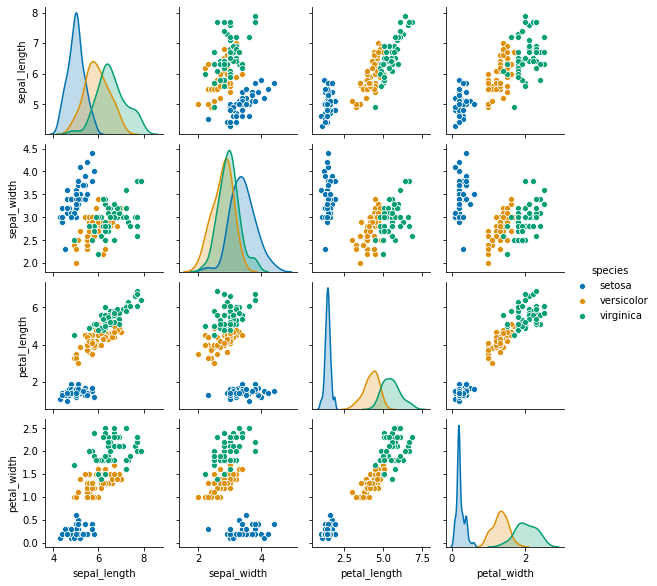

In [14]:
sns.pairplot(data, hue="species", height = 2, palette = 'colorblind');
plt.show()


- Not all distribuitons are gaussianes

- Si sont superposse cest pas bonee pour des classification

- Les meilleurs pour classifiction sont petal width et petal_lenget parce que sont distribuitons pas superposses.  

- Ils sont des characterisitics discriminants

- Le sepal length facilement permet avec une classificataeur linear separer setosa - by using petal length we can 
  separate iris-setosa

- by using sepal length,sepal width we can’t do anything because it’s all messed up and we can’t separate the flowers

- petal width iris setosa is not distributed properly

- so we are using the petal length as feature to separate at least the iris setosa.

- if 0≤petal_length≤2 and 0≤petal_width≤0.7then setosa

- if 2≤petal_lenght≤5.2 and 1≤petal_length≤1.7 then versicolor and else virginica


# 4. Selection de characteristics numeriques para filtrage

In [15]:
#https://www.kaggle.com/ar2017/basics-of-feature-selection-with-python

## 4.1. Variance Treshold methode

Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power. The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.

It should be noted that, before performing variance thresholding, all features should be standardized so they will have the same scale.

Scikit-learn provides VarianceThreshold function to perform variance threshold method.

We can create a selector instance of VarianceThreshold and use it to only select features with a variance higher than 0.1.

In [19]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=(0.1))
selector.fit_transform(X_train)

for feature in zip(fn, selector.variances_):
    print(feature)

('sepal_length', 0.6791111111111111)
('sepal_width', 0.15673580246913577)
('petal_length', 3.0430876543209884)
('petal_width', 0.5588444444444445)


High values of variance means this characteristics are highly discriminant, But this conclusion its not really exact when variables are different scales, on dois normaliser/standarizer les donnes.


### 4.1.1 With non standarized ni normalized data - Original Data training

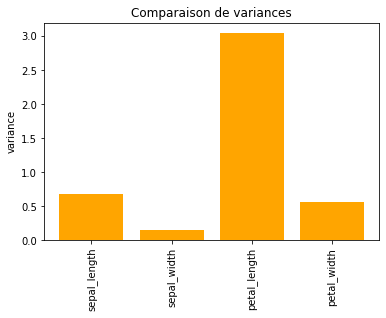

In [107]:
plt.bar(x=fn, height=selector.variances_, color='orange')
plt.xticks(rotation='vertical')
plt.ylabel('variance')
plt.title('Comparaison de variances')
plt.show()

In [21]:

#Optional  enlever bizarre data si necessaire #Perform tresholding variance
selector = VarianceThreshold(threshold=0.2)
X_train_new = selector.fit_transform(X_train)
print('Number of features before variances thresholding: {}'.format(X_train.shape[1]))
print('Number of features after variances thresholding: {}'.format(X_train_new.shape[1]))
display(X_train_new) #Une column fue eliminada a cause de variance tres bas

Number of features before variances thresholding: 4
Number of features after variances thresholding: 3


array([[6.6, 4.4, 1.4],
       [6.8, 4.8, 1.4],
       [6.5, 5.8, 2.2],
       [6.4, 5.6, 2.1],
       [6. , 4.8, 1.8],
       [7.2, 5.8, 1.6],
       [5.6, 4.1, 1.3],
       [6.4, 5.3, 1.9],
       [6.7, 4.7, 1.5],
       [5.7, 4.1, 1.3],
       [5.2, 1.5, 0.2],
       [5. , 3.5, 1. ],
       [5.6, 3.9, 1.1],
       [6. , 5.1, 1.6],
       [4.3, 1.1, 0.1],
       [6.1, 4.7, 1.2],
       [7.3, 6.3, 1.8],
       [4.8, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [6.3, 5.1, 1.5],
       [7. , 4.7, 1.4],
       [6.3, 5.6, 1.8],
       [7.1, 5.9, 2.1],
       [5. , 1.2, 0.2],
       [5. , 1.3, 0.3],
       [5.8, 4.1, 1. ],
       [5.1, 1.5, 0.2],
       [5.5, 3.7, 1. ],
       [6.7, 5.7, 2.1],
       [4.8, 1.4, 0.1],
       [5.5, 3.8, 1.1],
       [5.4, 1.5, 0.2],
       [7.7, 6.1, 2.3],
       [4.9, 1.5, 0.1],
       [6.3, 4.9, 1.8],
       [4.6, 1.5, 0.2],
       [5.1, 1.5, 0.4],
       [5. , 1.6, 0.4],
       [6.3, 5.6, 2.4],
       [5.7, 4.2, 1.2],
       [5.4, 1.5, 0.4],
       [4.6, 1. 

### 4.1.2. Normalised data

<BarContainer object of 4 artists>

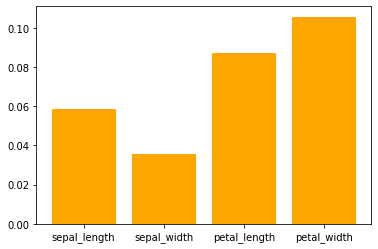

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
selector = VarianceThreshold()
X_train_tresholding = selector.fit_transform(X_train_normalized)
plt.bar(x=fn, height=selector.variances_, color='orange')

#Normalised data improve the quality of my analysis and petal_lenght et petal_width sont les variables de plus variance

# 5.  Desicicion Trees

In [43]:
# Construction des arbres de desicion
# https://medium.com/intuitive-machine-learning/decision-trees-concepts-with-iris-dataset-304648b961f5 - see pdf

from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, random_state = 1)
#desicionTree = tree.DecisionTreeClassifier(random_state = 1)
desicionTree.fit(X_train, Y_train)

#max_depth: The maximum depth of the tree. If None, then nodes are expanded until all 
#           leaves are pure or until all leaves contain less than min_samples_split samples.

# random_state has to be fixed to an integer

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## 5.1. Predict and Evaluate tree presicion

In [47]:
# Test de l'arbre de descion

from sklearn import metrics

Y_prediction = desicionTree.predict(X_test)
print('Presicion tree: ', "{:.3f}".format(metrics.accuracy_score(Y_prediction, Y_test)))

# Les characteristics plus pertinant sont tres haut dans l'arbre
# Les nodes intermediares sont desicion nodes.
# Les nodes finaux sont leaf nodes.

#You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.
     

Presicion tree:  0.983


[Text(209.25, 380.52, 'petal_width <= 0.75\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal_width <= 1.75\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'petal_length <= 4.95\ngini = 0.213\nsamples = 33\nvalue = [0, 29, 4]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.069\nsamples = 28\nvalue = [0, 27, 1]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal_length <= 4.85\ngini = 0.071\nsamples = 27\nvalue = [0, 1, 26]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]\nclass = virginica')]

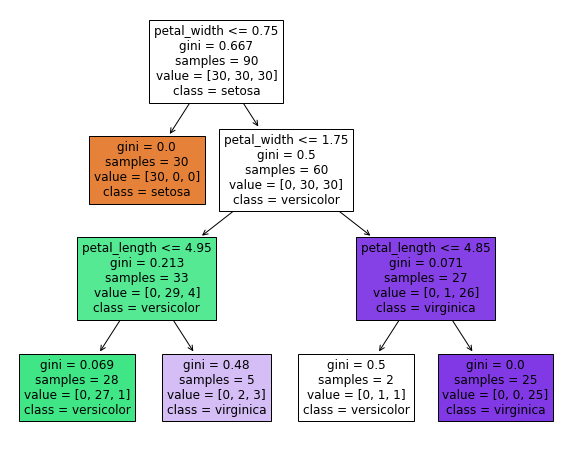

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = fn, class_names = cn, filled = True)

In [46]:
# TODO avec normalized et standarized
# Avec bizarre data included

In [52]:
from sklearn.metrics import confusion_matrix

species = Y_test
predictions = np.array(Y_prediction)

#La matriz de confusion permite evaluar la presicion del modelo.
confusion_matrix(species, predictions)

array([[20,  0,  0],
       [ 0, 20,  0],
       [ 0,  1, 19]], dtype=int64)

In [ ]:
#As we can see, our decision tree classifier correctly classified 59/60 samples.

True Positive:
Interpretation: You predicted positive and it’s true.

You predicted that a woman is pregnant and she actually is.
True Negative:
Interpretation: You predicted negative and it’s true.

You predicted that a man is not pregnant and he actually is not.
False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.

You predicted that a man is pregnant but he actually is not.
False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.

You predicted that a woman is not pregnant but she actually is.

That being said, the numbers on the diagonal of the confusion matrix correspond to correct predictions. When there are more than two potential outcomes, we simply extend the number of columns and rows in the confusion matrix.

https://www.python-course.eu/Decision_Trees.php

 There are also other types of measures which can be used to calculate the information gain. The most prominent ones are the: Gini Index, Chi-Square, Information gain ratio, Variance